# AIG140 - Group 03 - Lab11 - Time Series

# Part I: Getting Started

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Load the dataset

In [42]:
df = pd.read_csv(r"Open Power Systems Data.csv") # Load the CSV file
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # Convert the Date column to datetime format
df.set_index('Date', inplace=True) # Set the Date column as the index of the DataFrame.
df

,Consumption
Date,
2021-01-01,53.528105
2021-01-02,51.939873
2021-01-03,54.191159
2021-01-04,57.720713
2021-01-05,57.850840
...,...
2021-04-26,58.774786
2021-04-27,59.778780
2021-04-28,58.451054


### Explore the data

In [43]:
df.head() # Display the first few rows of the DataFrame

,Consumption
Date,
2021-01-01,53.528105
2021-01-02,51.939873
2021-01-03,54.191159
2021-01-04,57.720713
2021-01-05,57.850840


In [44]:
df.tail() # Display the last few rows of the DataFrame

,Consumption
Date,
2021-04-26,58.774786
2021-04-27,59.778780
2021-04-28,58.451054
2021-04-29,60.994476
2021-04-30,62.704855


In [45]:
df.describe() # Display summary statistics of the DataFrame

,Consumption
count,120.000000
mean,56.215223
std,4.979767
min,42.563893
25%,53.356334
50%,55.947536
75%,59.983650
max,68.244350


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2021-01-01 to 2021-04-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


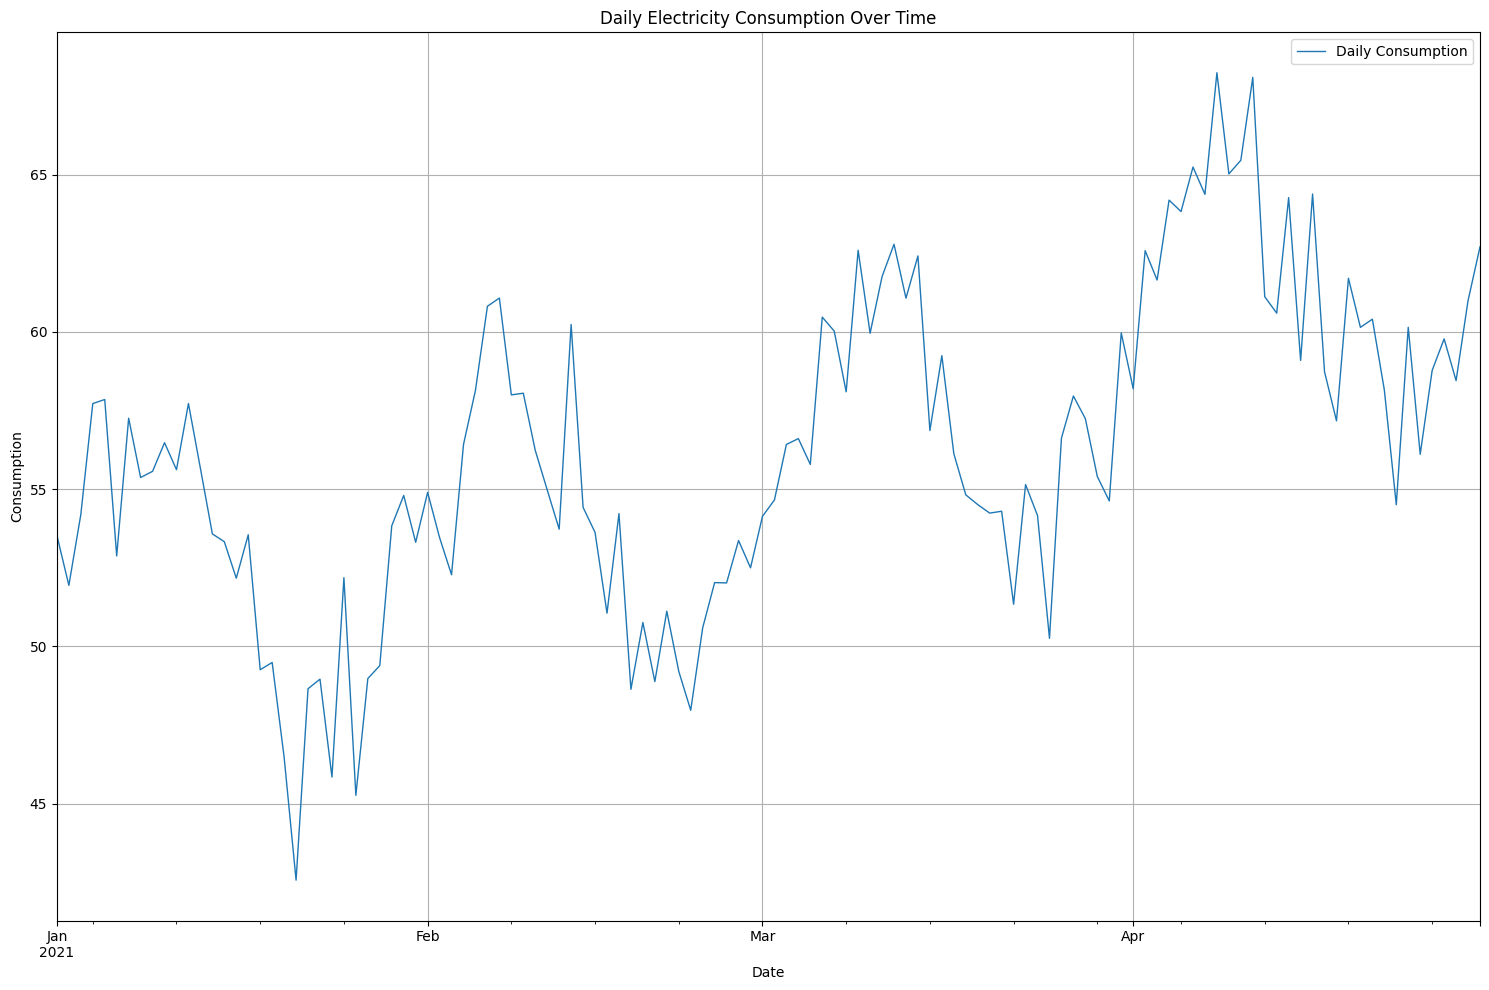

In [47]:
plt.figure(figsize=(15, 10))
df["Consumption"].plot(label="Daily Consumption", linewidth=1)
plt.title("Daily Electricity Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Part II: Time Series Components

### Trend

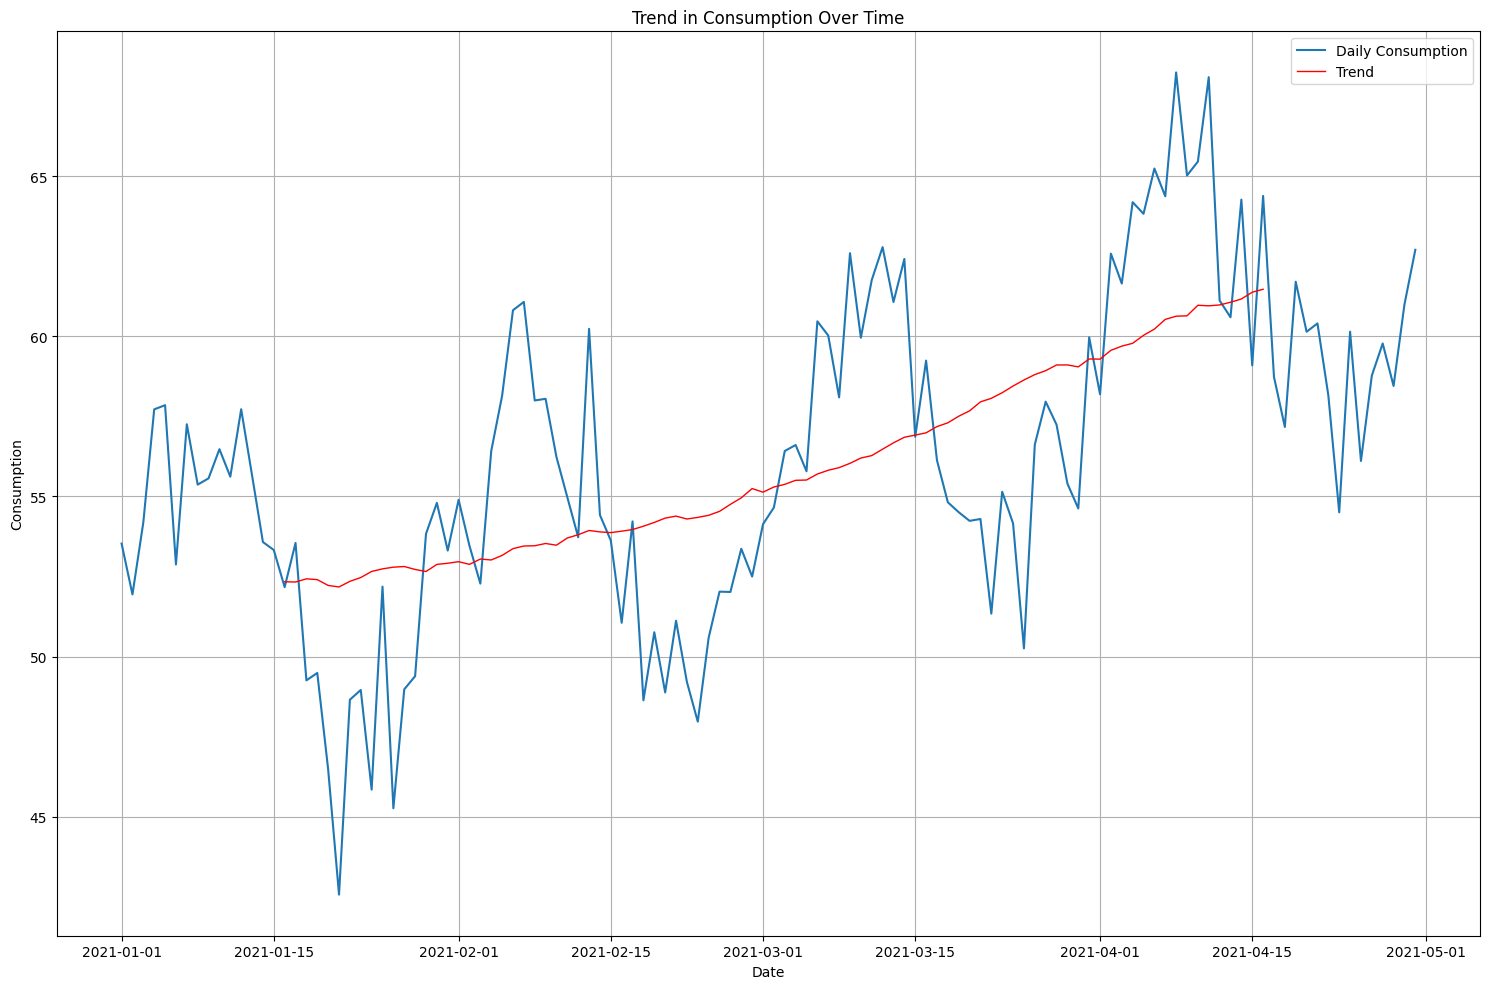

In [48]:
plt.figure(figsize=(15, 10))
df["Trend"] = df["Consumption"].rolling(window=30, center=True).mean()
plt.plot(df.index, df["Consumption"], label='Daily Consumption')
plt.plot(df.index, df["Trend"], label='Trend', color='red', linewidth=1)
plt.title("Trend in Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Seasonality

C:\Users\JonathanChackoPattas\AppData\Local\Temp\ipykernel_888\3585960106.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df["Consumption"].resample("M").mean()


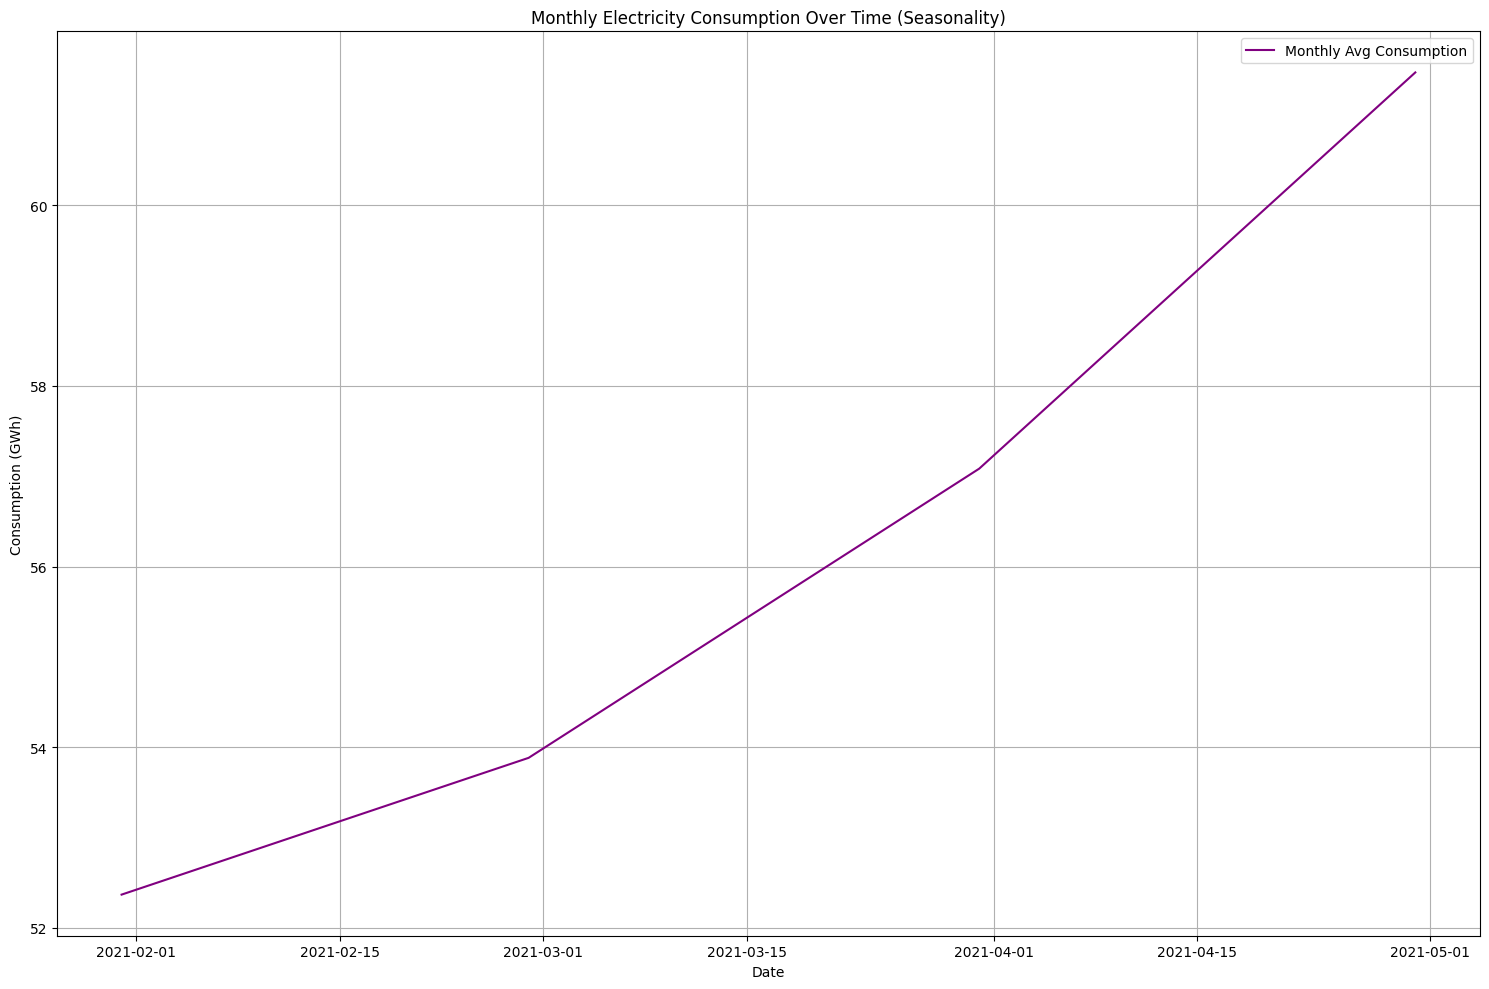

In [49]:
monthly = df["Consumption"].resample("M").mean()
plt.figure(figsize=(15, 10))
plt.plot(monthly.index, monthly.values, color='purple', label='Monthly Avg Consumption') # monthly.plot(label='Monthly Avg Consumption', color='purple')
plt.title("Monthly Electricity Consumption Over Time (Seasonality)")
plt.xlabel("Date")
plt.ylabel("Consumption (GWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Cyclicality

C:\Users\JonathanChackoPattas\AppData\Local\Temp\ipykernel_888\2099381690.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df["Consumption"].resample("M").mean()


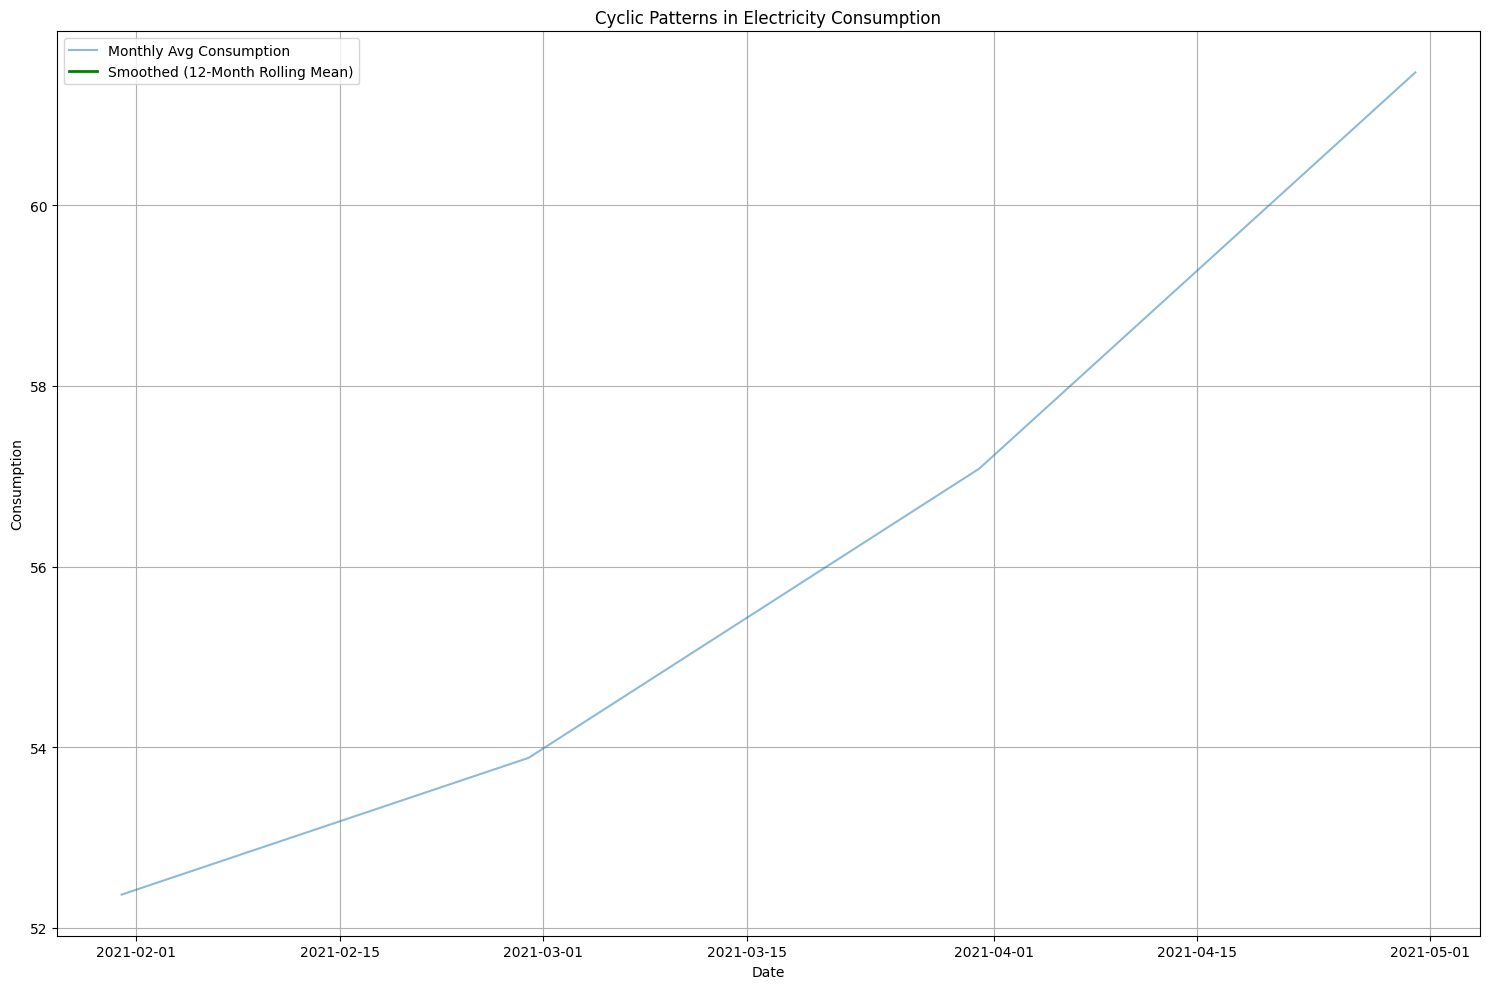

In [50]:
monthly = df["Consumption"].resample("M").mean()
cycle = monthly.rolling(window=12, center=True).mean()
plt.figure(figsize=(15, 10))
plt.plot(monthly.index, monthly.values, label="Monthly Avg Consumption", alpha=0.5)
plt.plot(cycle.index, cycle.values, label="Smoothed (12-Month Rolling Mean)", color='green', linewidth=2)
plt.title("Cyclic Patterns in Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Noise

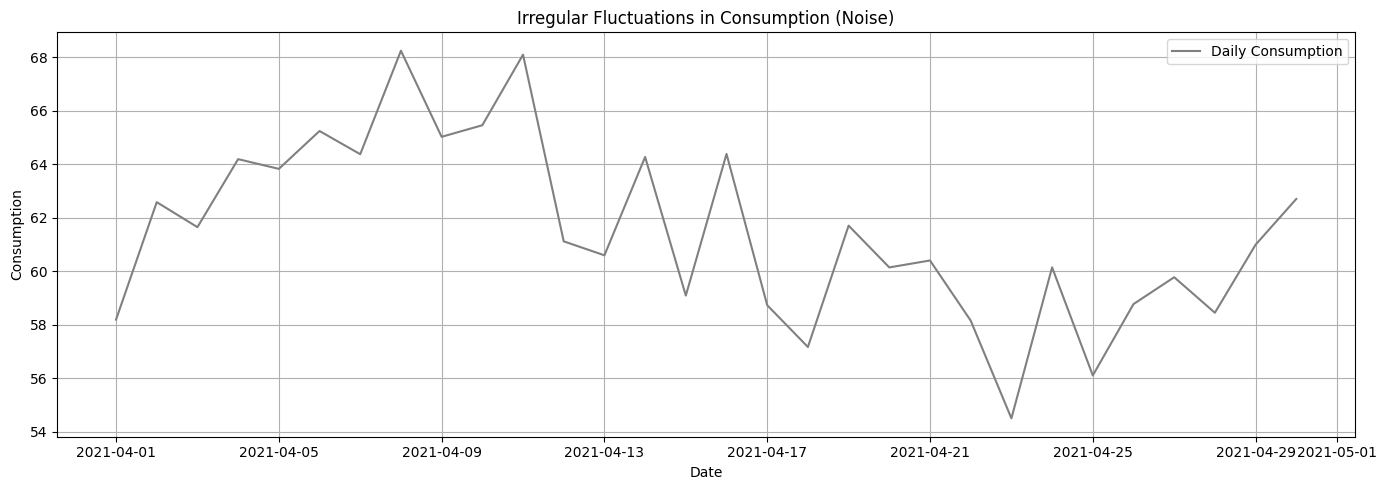

In [51]:
noise_window = df.loc["2021-04-01":"2021-05-01"]
plt.figure(figsize=(14, 5))
plt.plot(noise_window.index, noise_window["Consumption"], label="Daily Consumption", color='gray')
plt.title("Irregular Fluctuations in Consumption (Noise)")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Part III: Rolling Statistics

### Smoothing with a Rolling Mean

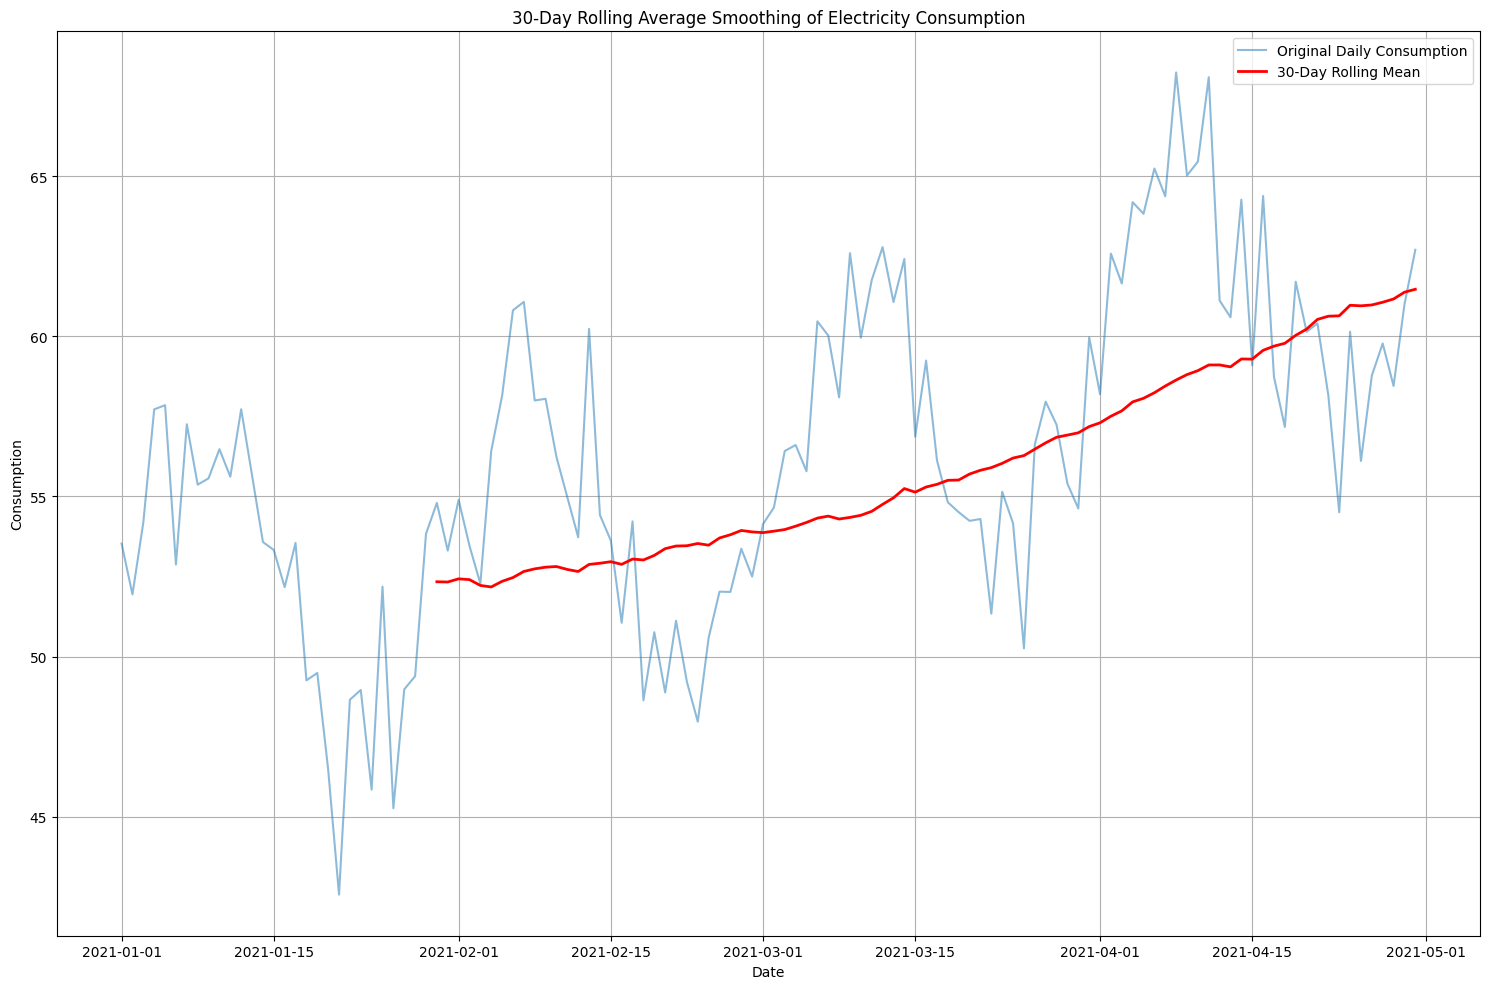

In [52]:
df["Rolling_Mean_30"] = df["Consumption"].rolling(window=30).mean()
plt.figure(figsize=(15, 10))
plt.plot(df.index, df["Consumption"], label="Original Daily Consumption", alpha=0.5)
plt.plot(df.index, df["Rolling_Mean_30"], label="30-Day Rolling Mean", color='red', linewidth=2)
plt.title("30-Day Rolling Average Smoothing of Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Part IV: Additive Decomposition

### Manual Decomposition (Simulated)

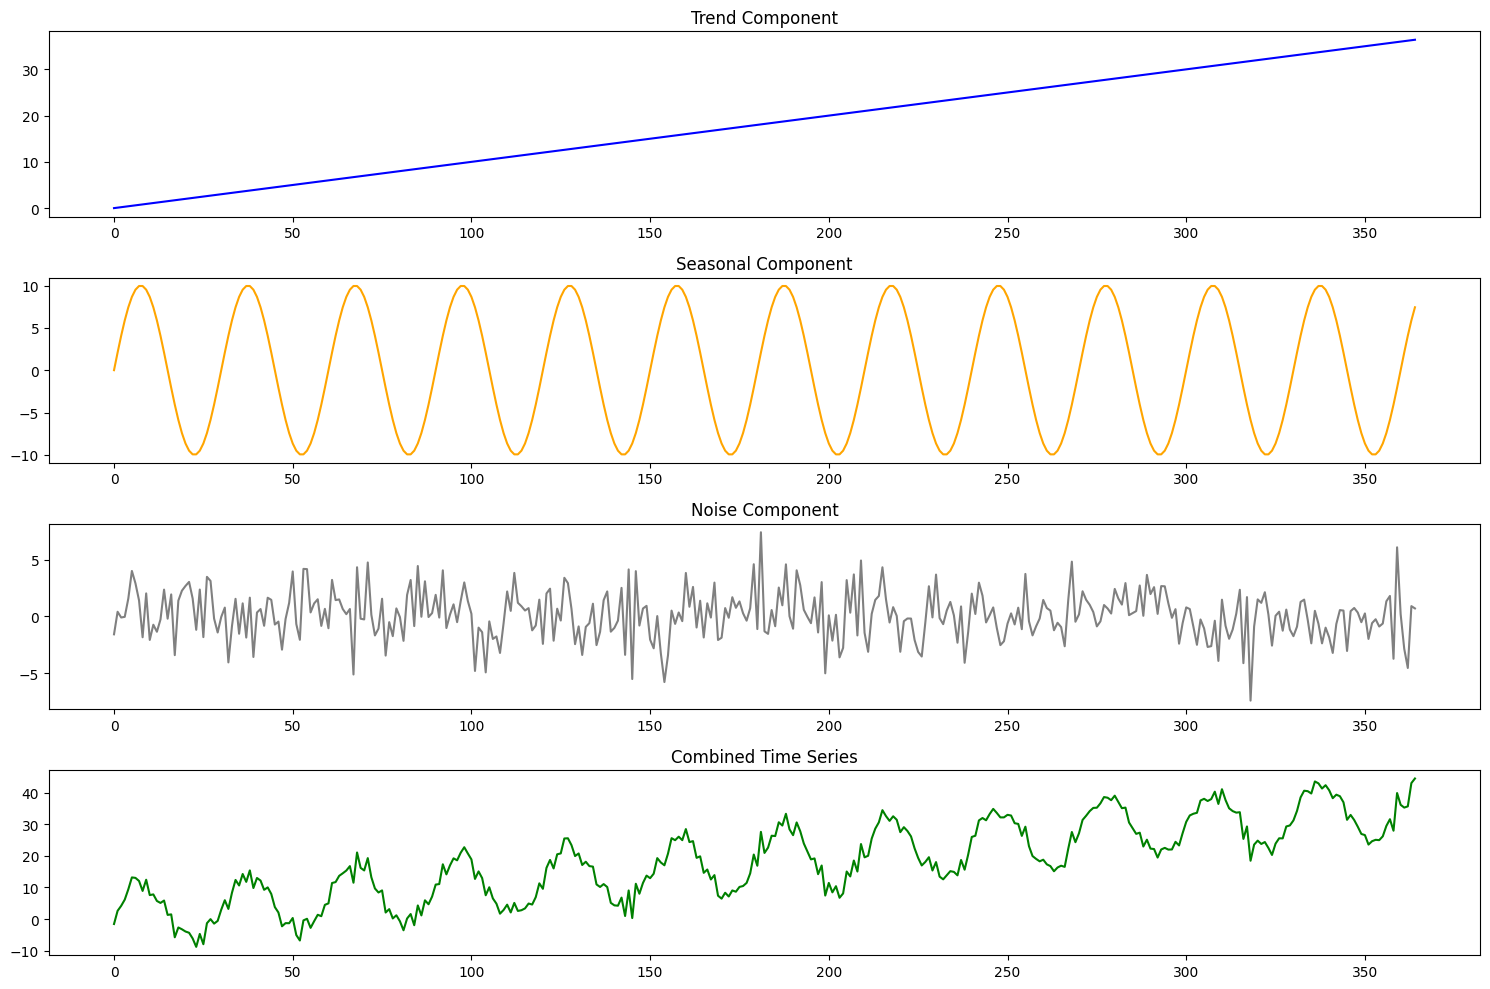

In [53]:
N = 365  # simulate 1 year of daily data
days = np.arange(N)
trend = 0.1 * days  # steady increase over time
seasonality = 10 * np.sin(2 * np.pi * days / 30)  # repeating pattern every ~30 days
noise = np.random.normal(0, 2, size=N)   # small random noise
combined = trend + seasonality + noise

# 4. Plot each component and the combined signal
plt.figure(figsize=(15, 10))

# Trend
plt.subplot(4, 1, 1)
plt.plot(days, trend, color='blue')
plt.title("Trend Component")

# Seasonality
plt.subplot(4, 1, 2)
plt.plot(days, seasonality, color='orange')
plt.title("Seasonal Component")

# Noise
plt.subplot(4, 1, 3)
plt.plot(days, noise, color='gray')
plt.title("Noise Component")

# Combined
plt.subplot(4, 1, 4)
plt.plot(days, combined, color='green')
plt.title("Combined Time Series")

plt.tight_layout()
plt.show()